In [3]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

In [4]:
centers = [[1,1], [-1,-1], [1,-1]]
X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [5]:
import matplotlib.pyplot as plt
from itertools import cycle

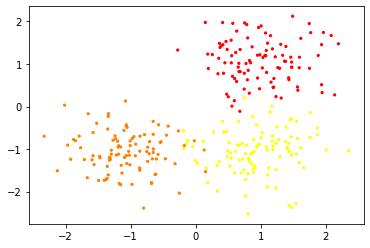

In [7]:
plt.scatter(X[:,0], X[:,1], c=labels, s=5, cmap="autumn")

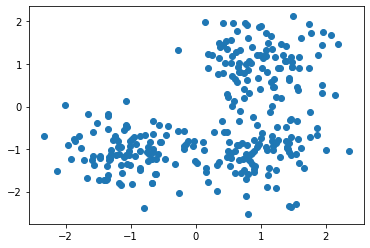

In [8]:
plt.scatter(X[:,0], X[:,1])

In [9]:
af = AffinityPropagation(preference=-50).fit(X)

C:\Users\LGARAVITO2\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


In [12]:
cluster_center_ids = af.cluster_centers_indices_

In [14]:
labels = af.labels_

In [15]:
n_clust = len(cluster_center_ids)
n_clust

3

In [20]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_ids)
    clust_labels = af.labels_
    
    print("Numero estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels, clust_labels))
    print("Compleitud: %0.3f"%metrics.completeness_score(labels, clust_labels))
    print("V-measure: %0.3f"%metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, clust_labels))
    print("Información mutua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels, clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members,0], X[class_members, 1], col +'.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0], x[0]], [clust_center[1], x[1]], col)
            
    plt.title("Numero estimado de clusters: %d"%n_clust)
    plt.show()

C:\Users\LGARAVITO2\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


Numero estimado de clusters: 3
Homogeneidad: 1.000
Compleitud: 1.000
V-measure: 1.000
R2 ajustado: 1.000
Información mutua ajustada: 1.000
Coeficiente de la silueta: 0.753


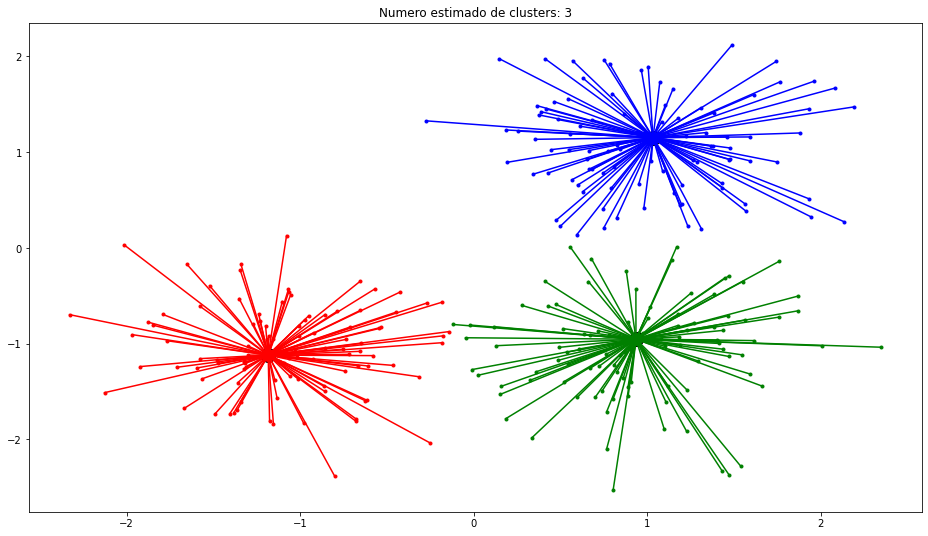

In [21]:
report_affinity_propagation(X)